In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy.stats import zscore
from scipy.stats import boxcox

from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report,confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()   #binary classification

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2398a799670>,
 'caps': [<matplotlib.lines.Line2D at 0x2398a7e0820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2398a783730>],
 'medians': [<matplotlib.lines.Line2D at 0x2398a78b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2398a78bd90>],
 'means': []}

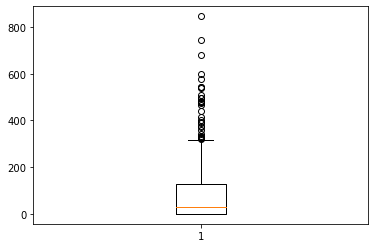

In [5]:
plt.boxplot(df['Insulin'])

# Feature scaling

In [6]:
x_df = df.drop('Outcome', axis=1)

In [7]:
x_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33


In [8]:
normal_scaler = MinMaxScaler()

arr = normal_scaler.fit_transform(x_df)

x_norm_df = pd.DataFrame(arr , columns=x_df.columns)

x_norm_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [9]:
std_scaler = StandardScaler()

arr = std_scaler.fit_transform(x_df)

x_std_df = pd.DataFrame(arr , columns=x_df.columns)

x_std_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722


# Train Test Split

In [10]:
x =df.drop('Outcome' , axis=1)
y = df['Outcome']

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [12]:
#normalization
x = x_norm_df.copy()
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [13]:
#stadaedization

x = x_std_df.copy()
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

# Model Training

In [14]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

# Evalution without scaling data

In [15]:
#testing data evalution


y_pred = knn_clf.predict(x_test)


cnf_mtx = confusion_matrix(y_test, y_pred)
print()
print('Confusion mtx is :-   \n', cnf_mtx)
print()
acc = accuracy_score(y_test, y_pred)
print('Acc is :- ', acc)


clf_report = classification_report(y_test, y_pred)

print('clss report is :- ' , clf_report)





Confusion mtx is :-   
 [[83 17]
 [20 34]]

Acc is :-  0.7597402597402597
clss report is :-                precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [16]:
#training data evalution


y_pred_train = knn_clf.predict(x_train)


cnf_mtx = confusion_matrix(y_train, y_pred_train)
print()
print('Confusion mtx is :-   \n', cnf_mtx)
print()
acc = accuracy_score(y_train, y_pred_train)
print('Acc is :- ', acc)


clf_report = classification_report(y_train, y_pred_train)

print('clss report is :- ' , clf_report)





Confusion mtx is :-   
 [[357  43]
 [ 74 140]]

Acc is :-  0.8094462540716613
clss report is :-                precision    recall  f1-score   support

           0       0.83      0.89      0.86       400
           1       0.77      0.65      0.71       214

    accuracy                           0.81       614
   macro avg       0.80      0.77      0.78       614
weighted avg       0.81      0.81      0.81       614



# Hyper parameter tuning

#### gridsearchcv

In [17]:
knn_clf  = KNeighborsClassifier()

hyp ={'n_neighbors':np.arange(4,35),
     'p':[1,2]}

gscv_knn =GridSearchCV(knn_clf,hyp, cv=5)

gscv_knn.fit(x_train,y_train)
gscv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=15)

knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [19]:
#testing data evalution


y_pred = knn_clf.predict(x_test)


cnf_mtx = confusion_matrix(y_test, y_pred)
print()
print('Confusion mtx is :-   \n', cnf_mtx)
print()
acc = accuracy_score(y_test, y_pred)
print('Acc is :- ', acc)


clf_report = classification_report(y_test, y_pred)

print('clss report is :- ' , clf_report)





Confusion mtx is :-   
 [[89 11]
 [26 28]]

Acc is :-  0.7597402597402597
clss report is :-                precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [20]:
#train data evalution


y_pred_train = knn_clf.predict(x_train)


cnf_mtx = confusion_matrix(y_train, y_pred_train)
print()
print('Confusion mtx is :-   \n', cnf_mtx)
print()
acc = accuracy_score(y_train, y_pred_train)
print('Acc is :- ', acc)


clf_report = classification_report(y_train, y_pred_train)

print('clss report is :- ' , clf_report)





Confusion mtx is :-   
 [[362  38]
 [ 93 121]]

Acc is :-  0.7866449511400652
clss report is :-                precision    recall  f1-score   support

           0       0.80      0.91      0.85       400
           1       0.76      0.57      0.65       214

    accuracy                           0.79       614
   macro avg       0.78      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614



# accuracy normalization data

In [21]:
#normalization
x = x_norm_df.copy()
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [22]:
#model 

knn_clf_norm = KNeighborsClassifier()
knn_clf_norm.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
#testing data evalution for normalize data


y_pred = knn_clf_norm.predict(x_test)


cnf_mtx_norm = confusion_matrix(y_test, y_pred)
print()
print('Confusion mtx is :-   \n', cnf_mtx)
print()
acc_norm = accuracy_score(y_test, y_pred)
print('Acc is :- ', acc)


clf_report_norm = classification_report(y_test, y_pred)

print('clss report is :- ' , clf_report)





Confusion mtx is :-   
 [[362  38]
 [ 93 121]]

Acc is :-  0.7866449511400652
clss report is :-                precision    recall  f1-score   support

           0       0.80      0.91      0.85       400
           1       0.76      0.57      0.65       214

    accuracy                           0.79       614
   macro avg       0.78      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614



In [24]:
#train data evalution for normalize data


y_pred_train = knn_clf_norm.predict(x_train)


cnf_mtx = confusion_matrix(y_train, y_pred_train)
print()
print('Confusion mtx is :-   \n', cnf_mtx)
print()
acc = accuracy_score(y_train, y_pred_train)
print('Acc is :- ', acc)


clf_report = classification_report(y_train, y_pred_train)

print('clss report is :- ' , clf_report)





Confusion mtx is :-   
 [[364  36]
 [ 76 138]]

Acc is :-  0.8175895765472313
clss report is :-                precision    recall  f1-score   support

           0       0.83      0.91      0.87       400
           1       0.79      0.64      0.71       214

    accuracy                           0.82       614
   macro avg       0.81      0.78      0.79       614
weighted avg       0.82      0.82      0.81       614



# hyperprameter tuning for norm data

#### gridsearch cv

In [25]:
knn_clf_norm  = KNeighborsClassifier()

hyp ={'n_neighbors':np.arange(4,40),
     'p':[1,2]}

gscv_knn_norm =GridSearchCV(knn_clf_norm,hyp, cv=5)

gscv_knn_norm.fit(x_train,y_train)
gscv_knn_norm.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [26]:
#model 

knn_clf_norm = KNeighborsClassifier(n_neighbors=33)
knn_clf_norm.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [27]:
#testing data evalution for normalize data hyp


y_pred = knn_clf_norm.predict(x_test)


cnf_mtx_norm = confusion_matrix(y_test, y_pred)
print()
print('Confusion mtx is :-   \n', cnf_mtx_norm)
print()
acc_norm = accuracy_score(y_test, y_pred)
print('Acc is :- ', acc_norm)


clf_report_norm = classification_report(y_test, y_pred)

print('clss report is :- ' , clf_report_norm)





Confusion mtx is :-   
 [[92  8]
 [29 25]]

Acc is :-  0.7597402597402597
clss report is :-                precision    recall  f1-score   support

           0       0.76      0.92      0.83       100
           1       0.76      0.46      0.57        54

    accuracy                           0.76       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



In [28]:
#train data evalution for normalize data hyp


y_pred_train = knn_clf_norm.predict(x_train)


cnf_mtx_norm = confusion_matrix(y_train, y_pred_train)
print()
print('Confusion mtx is :-   \n', cnf_mtx_norm)
print()
acc_norm = accuracy_score(y_train, y_pred_train)
print('Acc is :- ', acc_norm)


clf_report = classification_report(y_train, y_pred_train)

print('clss report is :- ' , clf_report_norm)





Confusion mtx is :-   
 [[371  29]
 [112 102]]

Acc is :-  0.7703583061889251
clss report is :-                precision    recall  f1-score   support

           0       0.76      0.92      0.83       100
           1       0.76      0.46      0.57        54

    accuracy                           0.76       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



# accuracy for standization

In [29]:
#stadaedization

x = x_std_df.copy()
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [30]:
#model 

knn_clf_std = KNeighborsClassifier()
knn_clf_std.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
#testing data evalution for std data


y_pred = knn_clf_std.predict(x_test)


cnf_mtx_std = confusion_matrix(y_test, y_pred)
print()
print('Confusion mtx is :-   \n', cnf_mtx_std)
print()
acc_std = accuracy_score(y_test, y_pred)
print('Acc is :- ', acc_std)


clf_report_std = classification_report(y_test, y_pred)

print('clss report is :- ' , clf_report_std)





Confusion mtx is :-   
 [[83 17]
 [20 34]]

Acc is :-  0.7597402597402597
clss report is :-                precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [32]:
#train data evalution for std data


y_pred_train = knn_clf_std.predict(x_train)


cnf_mtx_std = confusion_matrix(y_train, y_pred_train)
print()
print('Confusion mtx is :-   \n', cnf_mtx_std)
print()
acc_std = accuracy_score(y_train, y_pred_train)
print('Acc is :- ', acc_std)


clf_report_std = classification_report(y_train, y_pred_train)

print('clss report is :- ' , clf_report_std)





Confusion mtx is :-   
 [[357  43]
 [ 74 140]]

Acc is :-  0.8094462540716613
clss report is :-                precision    recall  f1-score   support

           0       0.83      0.89      0.86       400
           1       0.77      0.65      0.71       214

    accuracy                           0.81       614
   macro avg       0.80      0.77      0.78       614
weighted avg       0.81      0.81      0.81       614



# Hyperparameter tuning for std data

#### gridsearchcv

In [33]:
knn_clf_std  = KNeighborsClassifier()

hyp ={'n_neighbors':np.arange(4,40),
     'p':[1,2]}

gscv_knn =GridSearchCV(knn_clf_std,hyp, cv=5)

gscv_knn.fit(x_train,y_train)
gscv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [34]:
#model 

knn_clf_std = KNeighborsClassifier(n_neighbors=15)
knn_clf_std.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [35]:
#testing data evalution for std data


y_pred = knn_clf_std.predict(x_test)


cnf_mtx_std = confusion_matrix(y_test, y_pred)
print()
print('Confusion mtx is :-   \n', cnf_mtx_std)
print()
acc_std = accuracy_score(y_test, y_pred)
print('Acc is :- ', acc_std)


clf_report_std = classification_report(y_test, y_pred)

print('clss report is :- ' , clf_report_std)





Confusion mtx is :-   
 [[89 11]
 [26 28]]

Acc is :-  0.7597402597402597
clss report is :-                precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [36]:
#train data evalution for std data


y_pred_train = knn_clf_std.predict(x_train)


cnf_mtx_std = confusion_matrix(y_train, y_pred_train)
print()
print('Confusion mtx is :-   \n', cnf_mtx_std)
print()
acc_std = accuracy_score(y_train, y_pred_train)
print('Acc is :- ', acc_std)


clf_report_std = classification_report(y_train, y_pred_train)

print('clss report is :- ' , clf_report_std)





Confusion mtx is :-   
 [[362  38]
 [ 93 121]]

Acc is :-  0.7866449511400652
clss report is :-                precision    recall  f1-score   support

           0       0.80      0.91      0.85       400
           1       0.76      0.57      0.65       214

    accuracy                           0.79       614
   macro avg       0.78      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614



### randomized search cv